# In this exercise, we will generate a network from the BART GTFS data, which is not in pajek format.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
# Read relevant files as pandas dataframe
# path = r'/Users/xyzjayne/Documents/CP290E/Discussion 3/gtfs'
routes = pd.read_csv('routes.txt')
stops = pd.read_csv('stops.txt')
stop_times = pd.read_csv('stop_times.txt')
trips = pd.read_csv('trips.txt')

In [4]:
# What is in the stops file?
stops.head()

,stop_id,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,12TH,12th St. Oakland City Center,NaN,37.803768,-122.271450,12TH,http://www.bart.gov/stations/12TH/,0,NaN,NaN,1
1,16TH,16th St. Mission,NaN,37.765062,-122.419694,16TH,http://www.bart.gov/stations/16TH/,0,NaN,NaN,1
2,19TH,19th St. Oakland,NaN,37.808350,-122.268602,19TH,http://www.bart.gov/stations/19TH/,0,NaN,NaN,1
3,19TH_N,19th St. Oakland,NaN,37.808350,-122.268602,19TH,http://www.bart.gov/stations/19TH/,0,NaN,NaN,1
4,24TH,24th St. Mission,NaN,37.752470,-122.418143,24TH,http://www.bart.gov/stations/24TH/,0,NaN,NaN,1


In [5]:
# What is in the routes file?
routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color
0,1,BART,NaN,Pittsburg/Bay Point - SFIA/Millbrae,NaN,1,http://www.bart.gov/schedules/bylineresults?ro...,ffff33,NaN
1,3,BART,NaN,Warm Springs/South Fremont - Richmond,NaN,1,http://www.bart.gov/schedules/bylineresults?ro...,ff9933,NaN
2,5,BART,NaN,Warm Springs/South Fremont - Daly City,NaN,1,http://www.bart.gov/schedules/bylineresults?ro...,339933,NaN
3,7,BART,NaN,Richmond - Daly City/Millbrae,NaN,1,http://www.bart.gov/schedules/bylineresults?ro...,ff0000,NaN
4,11,BART,NaN,Dublin/Pleasanton - Daly City,NaN,1,http://www.bart.gov/schedules/bylineresults?ro...,0099cc,NaN


In [6]:
# What is in the trips file?
trips.head()

,route_id,service_id,trip_id,trip_headsign,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,1,WKDY,3610403WKDY,San Francisco International Airport,0,NaN,01_shp,1,1
1,1,SAT,3730600SAT,Millbrae,0,NaN,01_shp,1,1
2,1,SUN,3650800SUN,Millbrae,0,NaN,01_shp,1,1
3,1,WKDY,3630418WKDY,San Francisco International Airport,0,NaN,01_shp,1,1
4,1,SAT,3750558SAT,Millbrae,0,NaN,01_shp,1,1


In [7]:
# What is in the stop_times file?
stop_times.head(20)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint
0,3650800SUN,08:00:00,08:00:00,LAFY,1,Millbrae,NaN,NaN,NaN,1
1,3650800SUN,08:05:00,08:05:00,ORIN,2,Millbrae,NaN,NaN,NaN,1
2,3650800SUN,08:11:00,08:11:00,ROCK,3,Millbrae,NaN,NaN,NaN,1
3,3650800SUN,08:15:00,08:15:00,MCAR_S,4,Millbrae,NaN,NaN,NaN,1
4,3650800SUN,08:19:00,08:19:00,19TH,5,Millbrae,NaN,NaN,NaN,1
5,3650800SUN,08:20:00,08:20:00,12TH,6,Millbrae,NaN,NaN,NaN,1
6,3650800SUN,08:25:00,08:25:00,WOAK,7,Millbrae,NaN,NaN,NaN,1
7,3650800SUN,08:32:00,08:32:00,EMBR,8,Millbrae,NaN,NaN,NaN,1
8,3650800SUN,08:33:00,08:33:00,MONT,9,Millbrae,NaN,NaN,NaN,1
9,3650800SUN,08:35:00,08:35:00,POWL,10,Millbrae,NaN,NaN,NaN,1


## We create the network in three steps: adding nodes, adding node coordinates, adding edges.

In [8]:
# create an empty graph
G = nx.Graph()
# find the list that contains all the stops
print stops['stop_id']

0       12TH
1       16TH
2       19TH
3     19TH_N
4       24TH
5       ASHB
6       BALB
7       BAYF
8       CAST
9       CIVC
10      COLS
11      COLM
12      CONC
13      DALY
14      DBRK
15      DUBL
16      DELN
17      PLZA
18      EMBR
19      FRMT
20      FTVL
21      GLEN
22      HAYW
23      LAFY
24      LAKE
25      MCAR
26    MCAR_S
27      MLBR
28      MONT
29      NBRK
30      NCON
31      OAKL
32      ORIN
33      PITT
34      PHIL
35      POWL
36      RICH
37      ROCK
38      SBRN
39      SFIA
40      SANL
41      SHAY
42      SSAN
43      UCTY
44      WCRK
45      WARM
46      WDUB
47      WOAK
Name: stop_id, dtype: object


In [9]:
# add nodes
G.add_nodes_from(stops['stop_id'])

In [10]:
# create a dictionary of node coordinates
pos = dict(G.nodes)

for stop in pos:
    lon = float(stops[stops['stop_id'] == stop]['stop_lon'])
    lat = float(stops[stops['stop_id'] == stop]['stop_lat'])
    pos[stop] = (lon,lat)

In [11]:
# add links
# What we want: a list of edge, in the form of tuples
# For example, something like edge_list = [(stop_A,stop_B),(stop_B,stop_C)]
# then we can do: G.add_edges_from(edge_list)

In [12]:
# For each route, pick one trip and the corresponding stop lists
route_ids = routes.route_id.unique()
edge_list = []

for route_id in route_ids:
    # pick one trip (the first one for example)
    trip_id = trips[trips.route_id == route_id]['trip_id'].iloc[0]
    
    # extract the stop lists for this trip id from stop_times
    stop_list = list(stop_times[stop_times.trip_id == trip_id]['stop_id'])
    
    # for each list, generate the pairs of edges and append them to edge_list
    for i in range(0,len(stop_list)-1):
        edge_tuple = (stop_list[i],stop_list[i+1])
        
        if edge_tuple not in edge_list:
            edge_list.append(edge_tuple)

In [13]:
G.add_edges_from(edge_list)

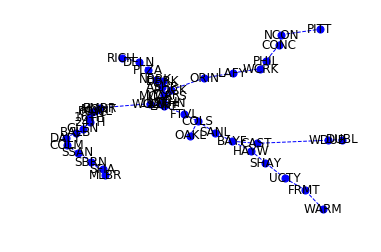

In [14]:
plt.figure()
nx.draw_networkx(G,pos = pos,node_size = 50,node_color = 'b',edge_color='b',style='dashed')
plt.axis('off')
plt.show()